In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 18})

In [41]:
L = 20
n = 80
x2 = np.linspace(-L/2,L/2,n+1)
x = x2[:n]
u = np.exp(-np.power(x,2))
u1 = np.exp(-0.1*np.power(x,2))
u2 = np.exp(-10*np.power(x,2))

ut = np.fft.fft(u)
ut1 = np.fft.fft(u1)
ut2 = np.fft.fft(u2)

uts = np.fft.fftshift(ut)
uts1 = np.fft.fftshift(ut1)
uts2 = np.fft.fftshift(ut2)

k = n*(2*np.pi/L)*np.fft.fftfreq(n)
km = n*np.fft.fftfreq(n)

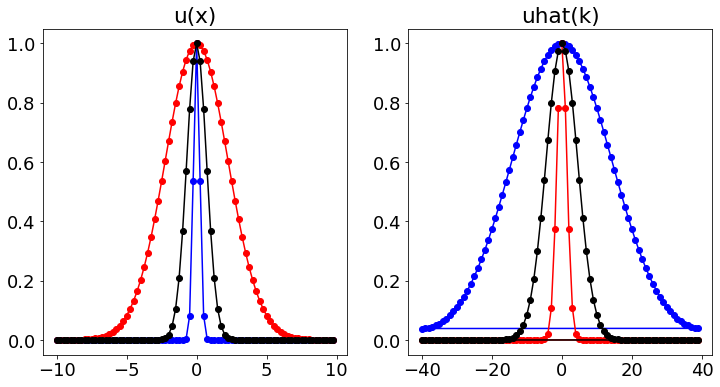

In [42]:
fig,axs = plt.subplots(1,2)
axs[0].plot(x,u2,'b-o')
axs[0].plot(x,u1,'r-o')
axs[0].plot(x,u,'k-o')
axs[0].set_title('u(x)')

axs[1].plot(km,np.abs(ut2)/np.max(np.abs(ut2)),'b-o')
axs[1].plot(km,np.abs(ut1)/np.max(np.abs(ut1)),'r-o')
axs[1].plot(km,np.abs(ut)/np.max(np.abs(ut)),'k-o')
axs[1].set_title('uhat(k)')

plt.show()

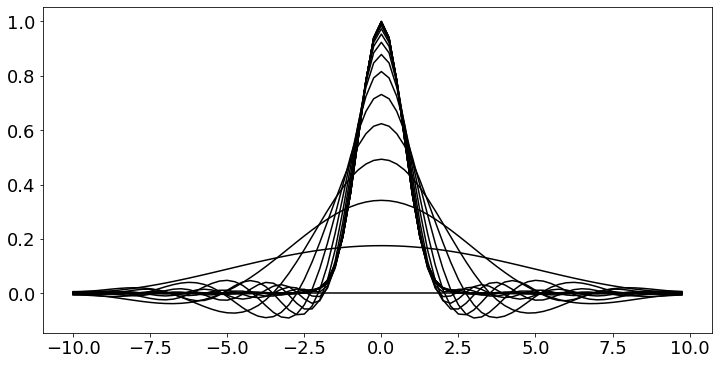

In [43]:
ut21 = np.zeros(n,dtype='complex_')
ut22 = np.zeros_like(ut21)
ut23 = np.zeros_like(ut21)

erx = np.zeros(19)
er1 = np.zeros_like(erx)
er2 = np.zeros_like(erx)
er3 = np.zeros_like(erx)

for j in range(19):
    for jj in range(j):
        ut21[(int(n/2)-1-jj) : (int(n/2)+1+jj)] = uts[(int(n/2)-1-jj) : (int(n/2)+1+jj)]
        ut22[(int(n/2)-1-jj) : (int(n/2)+1+jj)] = uts1[(int(n/2)-1-jj) : (int(n/2)+1+jj)]
        ut23[(int(n/2)-1-jj) : (int(n/2)+1+jj)] = uts2[(int(n/2)-1-jj) : (int(n/2)+1+jj)]
    
    ut31 = np.fft.fftshift(ut21)
    ut32 = np.fft.fftshift(ut22)
    ut33 = np.fft.fftshift(ut23)
    
    u31 = np.fft.ifft(ut31)
    u32 = np.fft.ifft(ut32)
    u33 = np.fft.ifft(ut33)
    
    plt.plot(x,np.real(u31),'k')
    
    erx[j] = 2*(j+1)+1
    er1[j] = np.linalg.norm(u-u31)
    er2[j] = np.linalg.norm(u1-u32)
    er3[j] = np.linalg.norm(u2-u33)
    

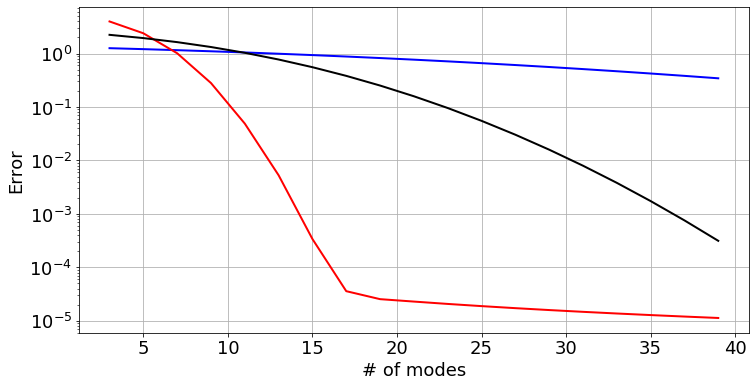

In [44]:
plt.semilogy(erx,er3,'b',linewidth=2)
plt.semilogy(erx,er2,'r',linewidth=2)
plt.semilogy(erx,er1,'k',linewidth=2)
plt.ylabel('Error')
plt.xlabel('# of modes')
plt.grid()

plt.show()